In [788]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [789]:
df = pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [790]:
#df = df[df['country'] == 'Uzbekistan']
# df

## Препроцессинг

### Дроп не влияющих показателей

In [791]:
df.drop(['country', 'HDI for year', 'country-year'], axis=1, inplace=True)
df.columns = df.columns.str.strip()
df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


## Замена запятой на пустоту, для преобразования в инт

In [792]:
df['gdp_for_year'].replace(',', '', inplace=True, regex=True)
df['gdp_for_year'].apply(lambda x: int(x))
df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


## Кодирование пола

In [793]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,1,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,1987,1,35-54 years,16,308000,5.19,2156624900,796,Silent
2,1987,0,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,1987,1,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,1987,1,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,2014,0,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,2014,0,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,2014,1,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,2014,0,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


## Энкод данных возраста и поколения

In [794]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [795]:
encoded_age = {
    '5-14 years': 0,
    '15-24 years': 1,
    '25-34 years': 2,
    '35-54 years': 3,
    '55-74 years': 4,
    '75+ years': 5,
}

df['age'] = df['age'].apply(lambda x: encoded_age[x])

df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,1,1,21,312900,6.71,2156624900,796,Generation X
1,1987,1,3,16,308000,5.19,2156624900,796,Silent
2,1987,0,1,14,289700,4.83,2156624900,796,Generation X
3,1987,1,5,1,21800,4.59,2156624900,796,G.I. Generation
4,1987,1,2,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,2014,0,3,107,3620833,2.96,63067077179,2309,Generation X
27816,2014,0,5,9,348465,2.58,63067077179,2309,Silent
27817,2014,1,0,60,2762158,2.17,63067077179,2309,Generation Z
27818,2014,0,0,44,2631600,1.67,63067077179,2309,Generation Z


In [796]:
df.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [797]:
encoded_generation = {
    'G.I. Generation': 0,   
    'Silent': 1,            
    'Boomers': 2,           
    'Generation X': 3,     
    'Millenials': 4,       
    'Generation Z': 5     
}

df['generation'] = df['generation'].apply(lambda x: encoded_generation[x])
df

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,1987,1,1,21,312900,6.71,2156624900,796,3
1,1987,1,3,16,308000,5.19,2156624900,796,1
2,1987,0,1,14,289700,4.83,2156624900,796,3
3,1987,1,5,1,21800,4.59,2156624900,796,0
4,1987,1,2,9,274300,3.28,2156624900,796,2
...,...,...,...,...,...,...,...,...,...
27815,2014,0,3,107,3620833,2.96,63067077179,2309,3
27816,2014,0,5,9,348465,2.58,63067077179,2309,1
27817,2014,1,0,60,2762158,2.17,63067077179,2309,5
27818,2014,0,0,44,2631600,1.67,63067077179,2309,5


## Скейл данных

In [798]:
Min_Max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
df['population'] = std_scaler.fit_transform(df[['population']])
df['year'] = Min_Max_scaler.fit_transform(df[['year']])
df['gdp_for_year'] = std_scaler.fit_transform(df[['gdp_for_year']])
df['gdp_per_capita'] = std_scaler.fit_transform(df[['gdp_per_capita']])


## Убираем строки где показатель суицида равен 0, так как скорее всего в этих странах просто не было подсчёта

In [799]:
df = df[df['suicides_no'] != 0]

## Статистика для df для нахождения выбросов

In [800]:
df.describe()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
count,23539.000000,23539.000000,23539.000000,23539.000000,23539.000000,23539.000000,23539.000000,23539.000000,23539.000000
mean,0.525489,0.521942,2.560049,286.691023,0.080938,15.146940,0.052590,0.019232,2.345724
std,0.272786,0.499529,1.641192,974.183210,1.066537,19.738891,1.078612,1.011656,1.381611
min,0.000000,0.000000,0.000000,1.000000,-0.471381,0.020000,-0.306507,-0.879719,0.000000
25%,0.322581,0.000000,1.000000,8.000000,-0.410580,2.780000,-0.295554,-0.718658,1.000000
50%,0.548387,1.000000,3.000000,42.000000,-0.321180,8.260000,-0.254106,-0.381181,2.000000
75%,0.774194,1.000000,4.000000,175.000000,0.067183,19.560000,-0.084110,0.469552,3.000000
max,1.000000,1.000000,5.000000,22338.000000,10.726876,224.970000,12.159693,5.796800,5.000000


## Правило трех сигм для чистки выбросов

In [801]:
df['zscore_suicides_no'] = stats.zscore(df['suicides_no'])
df['zscore_suicides_per_100k'] = stats.zscore(df['suicides/100k pop'])

df = df[
    (df['zscore_suicides_no'].abs() <= 3) &
    (df['zscore_suicides_per_100k'].abs() <= 3)
    ].drop(columns=['zscore_suicides_no', 'zscore_suicides_per_100k'])

C:\Users\Роман Ковалёв\AppData\Local\Temp\ipykernel_16400\1330123936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore_suicides_no'] = stats.zscore(df['suicides_no'])
C:\Users\Роман Ковалёв\AppData\Local\Temp\ipykernel_16400\1330123936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore_suicides_per_100k'] = stats.zscore(df['suicides/100k pop'])


## Матрица корреляций

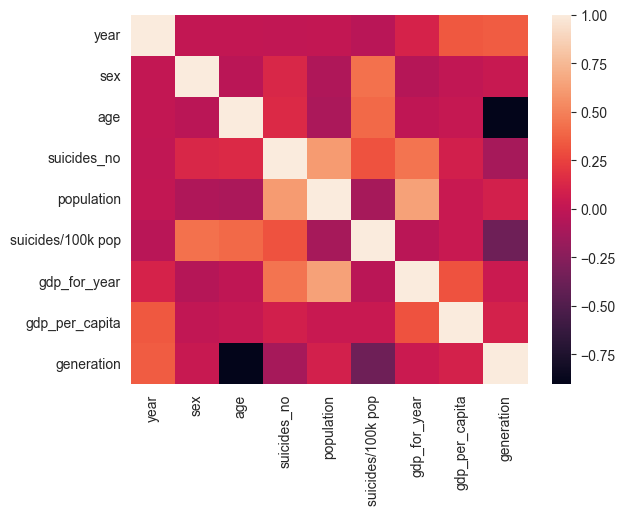

In [802]:
sns.heatmap(df.corr())
plt.show()

## Разделение на данные и ответы, а также на тренировочную и тестовую выборки

In [803]:
y1 = df['suicides_no']
y2 = df['suicides/100k pop']
X = df.drop(['suicides/100k pop', 'suicides_no'], axis=1)
y2

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: suicides/100k pop, Length: 22605, dtype: float64

## Разбиение на тест и на трейн выборки и обучение модели

In [804]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [805]:
MLP_regression_model = MLPRegressor(activation='relu', alpha=1, learning_rate='adaptive')
#MLP_regression_model = Ridge(alpha=1.0)
#MLP_regression_model = LinearRegression()
MLP_regression_model.fit(X_train, y_train)

C:\Users\Роман Ковалёв\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1, learning_rate='adaptive')

## Тест нейронки, а также зануление отрицательных значений

In [806]:
y_pred = MLP_regression_model.predict(X_test)
y_pred[y_pred < 0] = 0

## Точность нейросети

In [807]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Средняя квадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R²): {r2}")

Средняя абсолютная ошибка (MAE): 108.3250751058915
Средняя квадратичная ошибка (MSE): 56343.66528810454
Коэффициент детерминации (R²): 0.6930640052380928


In [814]:
pd.Series(y_pred).describe()

count    4521.000000
mean      201.574510
std       337.427624
min         0.000000
25%        16.133702
50%        71.534376
75%       212.074394
max      2525.154965
dtype: float64

In [815]:
pd.Series(y_test).describe()

count    4521.000000
mean      199.353019
std       428.495902
min         1.000000
25%         9.000000
50%        42.000000
75%       171.000000
max      3171.000000
Name: suicides_no, dtype: float64

## Просмотр весов

In [810]:
coefs = MLP_regression_model.coefs_

layer_dfs = []

for i, coef in enumerate(coefs):
    df_layer = pd.DataFrame(coef)

    df_layer.columns = [f'Neuron_{j}' for j in range(df_layer.shape[1])]
    df_layer.index = [f'Input_{j}' for j in range(df_layer.shape[0])]

    df_layer['Layer'] = f'Layer_{i + 1}'
    layer_dfs.append(df_layer)

combined_df = pd.concat(layer_dfs)
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Input'}, inplace=True)

combined_df

,Input,Neuron_0,Neuron_1,Neuron_2,Neuron_3,Neuron_4,Neuron_5,Neuron_6,Neuron_7,Neuron_8,...,Neuron_91,Neuron_92,Neuron_93,Neuron_94,Neuron_95,Neuron_96,Neuron_97,Neuron_98,Neuron_99,Layer
0,Input_0,0.710955,-1.143837,0.774221,2.662934,0.484655,0.413069,0.657169,0.529381,0.637157,...,0.611501,-1.575619,-7.310949e-08,0.425824,0.163378,-2.292940,-0.598438,-0.728579,-1.012580,Layer_1
1,Input_1,2.822331,4.948072,3.039244,-1.379782,2.893079,3.000884,2.530795,3.024287,4.333856,...,2.743633,5.446919,-6.675762e-38,2.991876,3.711608,0.771110,5.393974,7.831173,-0.885034,Layer_1
2,Input_2,1.815695,0.984016,1.579624,2.740961,1.647563,1.874768,1.488193,1.736445,1.524230,...,1.605614,0.621288,1.206192e-05,1.905665,1.366788,-4.940978,0.590625,-0.274015,-4.424514,Layer_1
3,Input_3,1.280922,1.800686,1.183848,-2.093925,1.277318,1.205857,1.174452,1.169101,-3.407569,...,1.410257,2.282382,1.589728e-31,1.397614,1.598238,2.396281,-4.967986,-7.936770,1.647847,Layer_1
4,Input_4,-0.268529,0.366467,0.048055,-2.077037,-0.060021,-0.133822,-0.373958,0.068987,-2.105920,...,-0.322343,0.746148,-2.454513e-40,-0.291995,-0.201794,3.164173,-1.246674,0.194035,3.260561,Layer_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Input_95,2.514612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Layer_2
103,Input_96,-6.534355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Layer_2
104,Input_97,-6.269321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Layer_2
105,Input_98,-10.764918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Layer_2


### Обработка весов

In [811]:
combined_df.replace(np.nan, 0)
combined_df.index = combined_df['Input']
combined_df.drop(['Input', 'Layer'], inplace=True, axis=1)
combined_df = combined_df.astype(float)
combined_df = combined_df.head(7)

### Визуализация весов

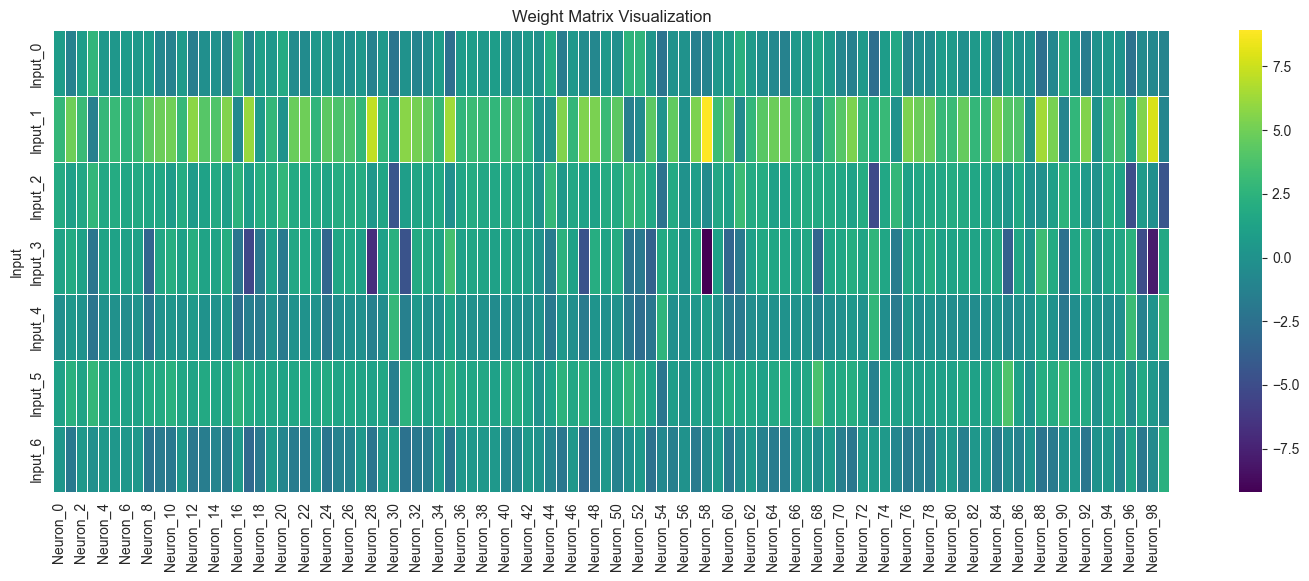

In [812]:
plt.figure(figsize=(18, 6))
# plt.imshow(combined_df, cmap='viridis', interpolation='none')
sns.heatmap(combined_df, cmap='viridis', cbar=True, linewidths=0.5, linecolor='white', annot=False)
# plt.colorbar()
plt.title('Weight Matrix Visualization')
plt.show()